# Homework 8 - Spectral embedding and clustering

This homework will not only help you get a better sense of how spectral embedding and clustering work, but also give you a stronger intuition for the "radial basis function" kernel, which is a common kernel used in many scientific applications.

Make sure you have downloaded:
- X1.csv
- X2.csv
- X3.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 0. Intro
Remember: 
- when performing spectral clustering, there is an adjacency matrix, which represents the graph/network of all data points. 
- Data points are connected if they are "close enough" to each together.
- **Question:** But what constitutes close enough?
- There are two ways to do this, as seen in the lecture notes on Embedding:
    - k-nearest neighbors
    - $\exp\left(-d^2/\epsilon\right)$ similarity: <u>radial basis function (RBF)</u> proximity.

You know how k-nearest neighbors works. So this homework will start with introducing basic understanding of RBF and how it measures proximity. After that, we will make some functions that streamlines your code and experiment with spectral clustering models on synthetically generated data.


## 1. Radial Basis Function (RBF)
The RBF kernel, a.k.a. squared exponential/Gaussian kernel, is a function that takes in two points and outputs a number to reflect the proximity of those two points.

More formally, if the two points are $x_1$ and $x_2$, the "proximity" of these points are 
$$
k(x_1, x_2) \ := \ \exp\left( - \frac{\|x_1-x_2\|^2}{2\gamma^2}\right),
$$
where $\gamma$ is a lengthscale parameter you can choose. 

($\gamma$ _essentially_ corresponds to the $\epsilon$ in the lecture notes and should remind you of the variance of a normal distribution PDF.)

The next task is to code up plot for RBF kernel, both in 1d and 2d. 

But before we do that, we make a simplifying trick to make these plots easier. 
- Notice that we are only concerned with the **distance** between two points, as represented in the $\|x_1-x_2\|$ term in the formula above.
- Hence, we can set distance $d = \|x_1-x_2\|$ to get a new formula for RBF kernel:
    $$
    k(d) \ := \ \exp\left( - \frac{d^2}{2\gamma^2}\right),
    $$



### 1.1 RBF Function
**Task:**

[1 pt] complete the code for the function `rbf()`
- `d` is an array of distances
    - if d is 1d, you may think of it as the x-axis. So, d[i] is the distance from 0: $\sqrt{(x-0)^2} = |x-0|$
    - if d is 2d, you may think of it as the xy-plane. So, d[i,j] is the distance from the origin (0,0): $\sqrt{((x-0)^2 + (y-0)^2}$
- `gamma` is the lengthscale parameter

In [2]:
def rbf(d,gamma):
    
    rbf_value = np.exp(-1 * d**2 / (2*gamma**2))
    
    return rbf_value

### 1.2 1d plot
**Task:**

[2 pt] On the same figure and axes, plot rbf kernel for 1d case with multiple gamma.
- set x-axis to be from [-10,10]
- y-axis represent $k(x,0)$
- set gamma = 1,2,3
- include title, axis labels, gridlines and a legend

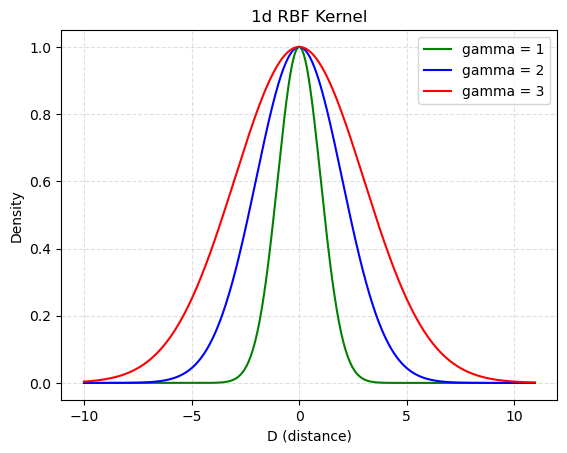

In [3]:
# TODO plot

x_axis_vals = np.arange(-10,11,0.05)

plt.plot(x_axis_vals, rbf(x_axis_vals,1), c = 'g', label = 'gamma = 1')
plt.plot(x_axis_vals, rbf(x_axis_vals,2), c = 'b', label = 'gamma = 2')
plt.plot(x_axis_vals, rbf(x_axis_vals,3), c = 'r', label = 'gamma = 3')


plt.grid(alpha=.4, linestyle='--'); plt.legend()
plt.xlabel('D (distance)')
plt.ylabel('Density')
plt.title('1d RBF Kernel')


plt.legend()


### 1.3 2d plot
**Task:**

[2 pt] On _3 separate_ axes, plot rbf kernel for 2d case with multiple gamma.
- your plot will be a surface
    - you may need to use np.meshgrid()
    - you may use fig.add_subplot(1,3,i,projection='3d') to make three plots in a row. You can refer to [this matplotlib tutorial](https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html#sphx-glr-gallery-mplot3d-subplot3d-py) for how to use it.
- set x-axis and y-axis to be both from [-10,10]
- z-axis will represent $k((x,y),(0,0))$
- set gamma = 1,2,3
- include titles on each plot to make clear which gamma is being plotted and axis labels

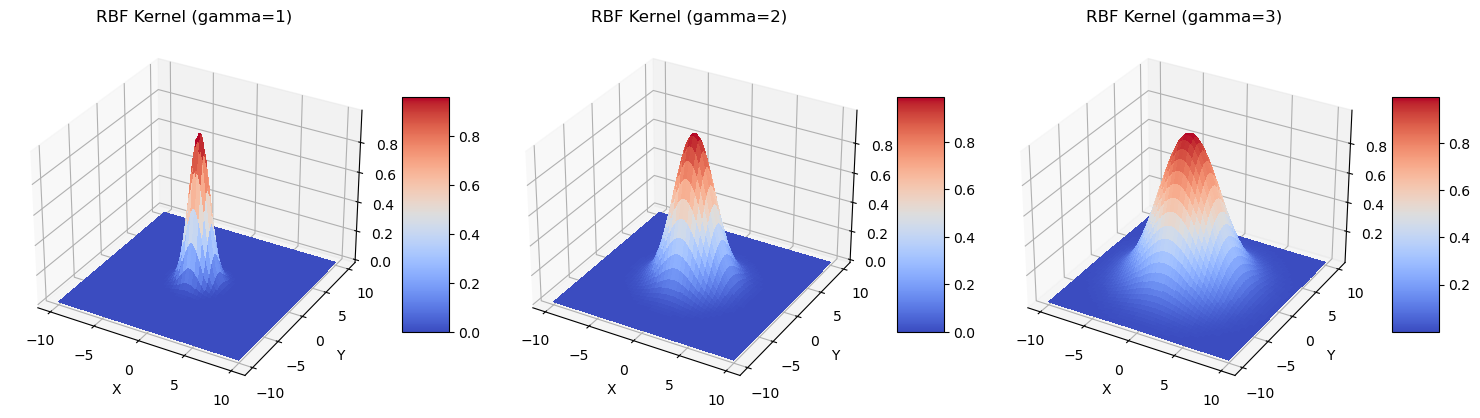

In [4]:
# TODO plot


from matplotlib import cm


fig = plt.figure(figsize=(15, 5))

for i, gamma in enumerate([1, 2, 3], start=1):
    
    ax = fig.add_subplot(1, 3, i, projection='3d')
    ax.set_title(f'RBF Kernel (gamma={gamma})')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('K((x,y),(0,0))')

    X = np.linspace(-10, 10, 100)
    Y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(X, Y)
    D = np.sqrt(X**2 + Y**2)
    Z = rbf(D, gamma)  

    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()







## 2. Spectral embedding/clustering functions
Before completing the spectral clustering experiments, complete the functions below.

**Task:**

[3 pt] complete code below for `embed_and_plot()`
- arguments, which will all be fed into the sklearn.manifold.SpectralEmbedding object:
    - `X`, data, number of samples by number of dimensions
    - `aff`, 'rbf' or 'nearest_neighbors' (short for affinity argument in SpectralEmbedding)
    - `gam`, gamma parameter for RBF kernel
    - `num_neighbors`, parameter for k-nearest neighbors
    - You can set default values for gam and num_neigbors to make your function calls later easier. Here is an [example](https://www.geeksforgeeks.org/default-arguments-in-python/) of how to write default parameters.
- your code should have two components
    1. make SpectralEmbedding object, fit it to data X, and obtain eigenvectors of embedding.
    2. three plots in the same row. (They should look)
        - scatter plot of embedding coordinates (eigenvector 1 against eigenvector 2)
        - scatter plot of embedding coordinates (eigenvector 2 against eigenvector 3)
        - scatter plot of sorted entries of eigenvector 1 (sorted index i against entry i)
- as usual, your plots should contain appropriate titles, axis labels, etc.
- You should read the SpectralEmbedding [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html) **carefully**, so as to not make mistakes when implementing. Useful skill for any coding activity.

In [5]:
from sklearn.manifold import SpectralEmbedding

def embed_and_plot(X, aff, gam=1, num_neighbors=1):
    # TODO make model, fit, and obtain eigenvectors

    se = SpectralEmbedding(n_components=3, affinity=aff, gamma=gam, n_neighbors = num_neighbors)

    f = se.fit_transform(X)
    
    plt.figure(figsize=(18,4))
    plt.subplot(131)
    # TODO scatter eigenvector 1 entries against eigenvector 2 entries
    
    plt.scatter(f[:,0],f[:,1],c='k',edgecolor='none',alpha=0.4);
    
    plt.title('sk-obj 12');
    plt.xlabel('Eigenvector 1')
    plt.ylabel('Eigenvector 2')

    
    plt.subplot(132)
    # TODO scatter eigenvector 2 entries against eigenvector 3 entries
    
    plt.scatter(f[:,1],f[:,2],c='k',edgecolor='none',alpha=0.4); 
    plt.title('sk-obj 23');
    plt.xlabel('Eigenvector 2')
    plt.ylabel('Eigenvector 3')
    
    # TODO scatter sorted eigenvector 1 entries
    s = np.argsort(f[:,1]) 
    plt.figure(figsize=(9,4)) 
    plt.subplot(121)
    plt.plot(f[s,1], 'xb', alpha=0.6)
    plt.title('Sorted Eigenvector 1 Entries')
    plt.xlabel('Sorted Index')
    plt.ylabel('Eigenvector 1 entry')
    
    plt.tight_layout()
    plt.show()

**Task:**

[2 pt] complete code below for `cluster_and_plot`
- arguments:
    - `X`, `aff`, `gam`, `num_neighbors` as in embed_and_plot
    - `n_clus` is the number of clusters that you want to split the data X into.
- your code should have two components:
    1. make SpectralClustering object, fit to data X, and predict the cluster labels.
    2. scatter plot of data with the predicted cluster labels. Include a title.


In [6]:
from sklearn.cluster import SpectralClustering

def cluster_and_plot(X, n_clus, aff, gam=1, num_neighbors=1):
    
    # TODO make model, fit, get cluster labels
    
    se = SpectralEmbedding(n_components=3, affinity=aff, gamma=gam, n_neighbors = num_neighbors)

    clusters = se.fit_predict(X)

    
   
    # TODO plot
    plt.figure(figsize=(9, 4))
    plt.subplot(121)

    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', alpha = 0.4)
    plt.title(f'Spectral Clustering with {n_clus} Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster Label')
    
    
    plt.show()

## 3. Cluster X1
Load and scatter plot `X1`.

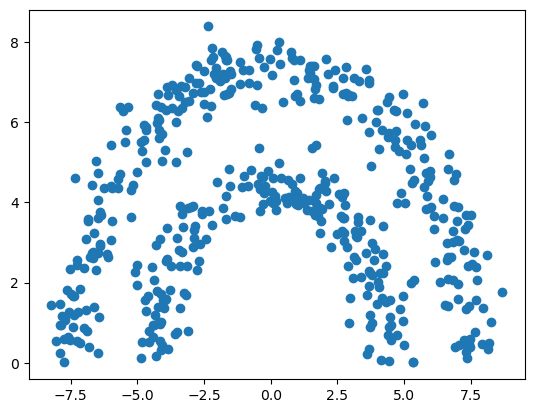

In [7]:
X1 = np.loadtxt('X1.csv', delimiter=',')
plt.scatter(X1[:,0], X1[:,1]); plt.show()

**Task:**

[1 pt] call embed_and_plot and cluster_and_plot on X1.
- you should correctly cluster the data into the two obvious clusters.
- experiment with different choices of affinity (rbf/nearest_neighbors) and parameter values (gamma/n_neighbors)
- all plots should be visible.

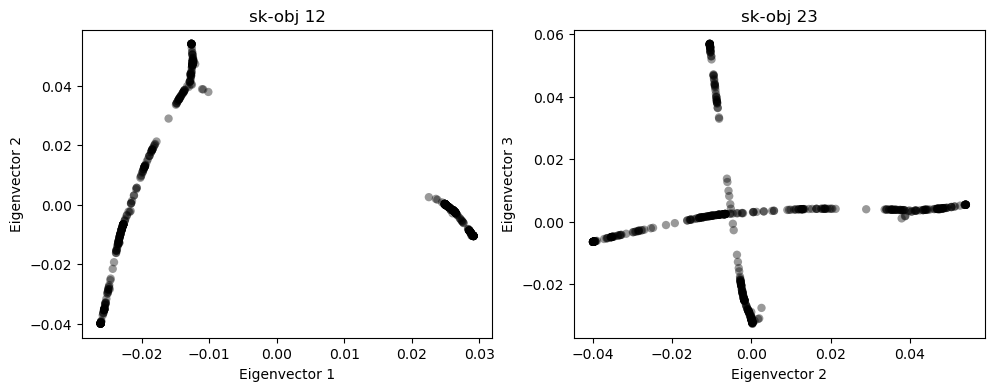

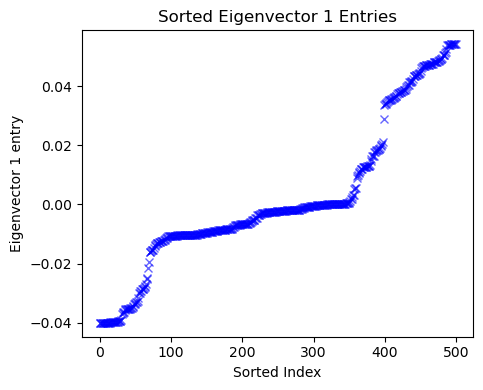

AttributeError: 'SpectralEmbedding' object has no attribute 'fit_predict'

In [8]:
# TODO
embed_and_plot(X1, aff='rbf', gam=6)
#embed_and_plot(X1, aff='nearest_neighbors', num_neighbors=50)

cluster_and_plot(X1, n_clus=2, aff='rbf', gam=6)
#cluster_and_plot(X1, n_clus=2, aff='nearest_neighbors', num_neighbors=50)

## 4. Cluster X2
Load and scatter plot `X2`.

In [ ]:
X2 = np.loadtxt('X2.csv', delimiter=',')
plt.scatter(X2[:,0], X2[:,1]); plt.show()

### 4.1 cluster
[1 pt] call embed_and_plot and cluster_and_plot on X2.
- same instructions as X1, except that you should obtain 3 clusters.

In [ ]:
# TODO

embed_and_plot(X2, aff='rbf', gam=6)
#embed_and_plot(X2, aff='nearest_neighbors', num_neighbors=50)

cluster_and_plot(X2, n_clus=3, aff='rbf', gam=6)
#cluster_and_plot(X2, n_clus=3, aff='nearest_neighbors', num_neighbors=50)

### 4.2 Compare to k-means and GMM
**Task:**

1. [2 pt] Think back to other clustering algorithms in this course. Between k-means and GMM, which is more approapriate for X2 data? 
    - Give a reason why your chosen clustering algorithm is suited the data. 
    - Give a reason why clustering algorithm you did not choose has a limitation that prevents it from being suitable to the data.

    **Ans:** GMM is more appropriate for X2 data because the shape of the data does not allow for the distance function of k-means to be useful. K-means distance function is best used for data that is completely spherical and with clusters that are far apart. However, our data is not quite spherical and our clusters are very close together, so GMM will be better. GMM uses gaussian kernels which do not require spherical data or clusters that are as far apart.
    
2. [2 pt] Implement the clustering algorithm that you chose in the previous question to be appropriate for X2 data.
    - You may use relevant sklearn packages.
    - Include a plot of the cluster labels to ensure that it is working exactly to how you expect.

In [ ]:
# TODO implement clustering based on your answer

from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# Fit GMM to the data
gmm = GaussianMixture(n_components=3)
gmm.fit(X2_scaled)
Cpred = gmm.predict(X2_scaled)

# Plot the clustered data
ax = plt.subplot(1, 1, 1, aspect='equal')
plt.scatter(X2[:, 0], X2[:, 1], c=Cpred, cmap=plt.cm.rainbow, alpha=0.7)

'''
# Plot the ellipses representing cluster shapes
for n in np.arange(gmm.n_components):
    cov = gmm.covariances_[n][:2, :2]
    v, w = np.linalg.eigh(cov)
    angle = 180 / np.pi * np.arctan2(w[0, 1], w[0, 0])
    for i in range(1, 4):  # Number of contours
        a = 2 * i * np.sqrt(v)
        ell = Ellipse(gmm.means_[n, :2], a[0], a[1], angle=angle)
        ell.set_alpha(0.2)
        ax.add_artist(ell)
'''

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GMM Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

## 5. Cluster X3
Load and scatter plot `X3`.


In [ ]:
X3 = np.loadtxt('X3.csv', delimiter=',')
plt.scatter(X3[:,0], X3[:,1]); plt.show()

### 5.1 Spectral embedding/clustering
[1 pt] call embed_and_plot and cluster_and_plot on X3.
- Same instructions as for X1 and X2.

In [ ]:
# TODO

embed_and_plot(X3, aff='rbf', gam=25)
#embed_and_plot(X3, aff='nearest_neighbors', num_neighbors=50)

cluster_and_plot(X3, n_clus=2, aff='rbf', gam=25)
#cluster_and_plot(X3, n_clus=2, aff='nearest_neighbors', num_neighbors=50)

### 5.2 When sklearn "doesn't work"
**Fix aff='rbf' and gam=8.**

Call embed_and_plot and cluster_and_plot on X3. (You should get a failed clustering) 

In [ ]:
# TODO Try aff='rbf' and gam=8

embed_and_plot(X3, aff='rbf', gam=8)

cluster_and_plot(X3, n_clus=2, aff='rbf', gam=8)


#### Your intervention to make spectral clustering still work
The sklearn package with spectral clustering doesn't seem to work with parameters as fixed above (aff='rbf' and 'gam=8'). So, we need to go beyond default package implementations and make some adjustments to show that the overarching idea of spectral clustering still works.

**Task:**
1. [2 pt] What do you observe about the points scattered in the <u>_embedding_</u> plots for X1, X2, and X3 when the spectral clustering method successfully clusters the data? Explain how the spectral embedding plots suggests to us that the spectral embedding method should still be applicable in clustering X3 data with these fixed parameter values.

    **Ans:** The points scattered in the embedding are highly concentrated into their clusters when the spectral clustering method works. Essentially, you can pretty much tell if your clustering method works just by looking at your embedding and checking if the clusters are separated. The spectral embedding plots for these fixed parameter values are encouraging because there seem to be two clusters of data, they just are not very concentrated. If we can adjust our labelling process, we should be able to obtain the two correct clusters.
    
2. [1 pt] Make an adjustment to the clustering process in order to successfully cluster the data.
    - You do not have to call the functions we wrote earlier. You can write it up yourself, using any relevant sklearn packages.
    - Make sure to plot the successful clustering results.
    - Hint: You can use the same spectral embedding, but perform a different clustering process on the embedded data.
    - Hint: Use the second eigenvector, not the first! A simple thresholding suffices for the intent of this homework.
        - However, to stretch your skills/get practice, you may perform a clustering algorithm (k-means/GMM) on the embedded data instead of the simple thresholding suggested above. It's just a few lines of code.

In [ ]:
# TODO make spectral clustering work :)

from sklearn.cluster import KMeans


def spectral_Embedding(X, aff, gam=1, num_neighbors=1):
    se = SpectralEmbedding(n_components=2, affinity=aff, gamma=gam, n_neighbors=num_neighbors)
    f = se.fit_transform(X)
    return f

f = spectral_Embedding(X3, aff='rbf', gam=8)  

#Using the second eigenvector to cluster (index 1)
embedding_2nd = f[:, 1].reshape(-1, 1)  # Reshape to make k means compatible

#K-means on embedded data
kmeans = KMeans(n_clusters=2)
Cpred_kmeans = kmeans.fit_predict(embedding_2nd)

plt.scatter(X3[:, 0], X3[:, 1], c=Cpred_kmeans, cmap='viridis', alpha=0.4)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data with Clustering Labels')
plt.colorbar(label='Cluster Label')
plt.show()

#graph of the embedded data using second eigenvector
plt.scatter(embedding_2nd[:, 0], np.zeros_like(embedding_2nd), c='blue', alpha=0.4)
plt.xlabel('Second Eigenvector')
plt.title('Spectral Embedding (Second Eigenvector)')
plt.show()


